In [ ]:
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
PATH_CLEAN = Path("Clean")

In [3]:
def print_entire_df(df):
    with pl.Config() as cfg:
        cfg.set_tbl_rows(-1) # Display all rows
        cfg.set_tbl_cols(-1) # Display all columns
        cfg.set_tbl_width_chars(999)
        print(df)

In [4]:
plt.rcParams.update({'font.size': 16})

In [ ]:
rateclasses = {}

for path in PATH_CLEAN.iterdir():
    if path.name == "weather.csv" :
        continue

    df = (
        pl.read_csv(path, try_parse_dates=True)
    )

    rateclasses[path.stem] = df

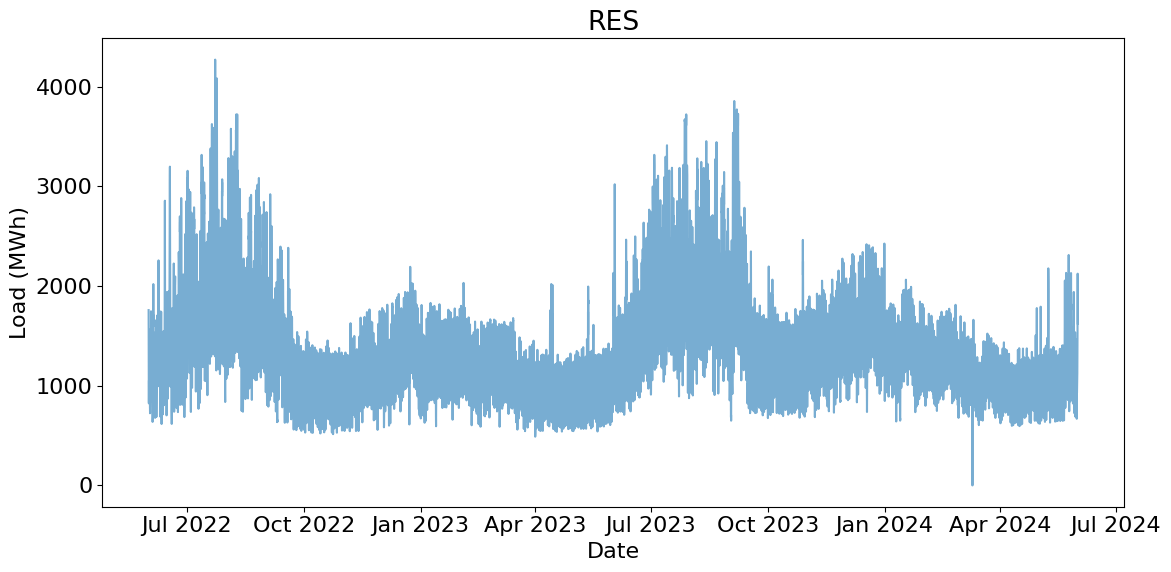

In [6]:
res = rateclasses["RES"]
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(xlabel='Date', ylabel='Load (MWh)')
ax.plot(
        res["Date"],
        res["Load"],
        alpha=0.6,
    )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_title("RES")
plt.tight_layout()
plt.show()

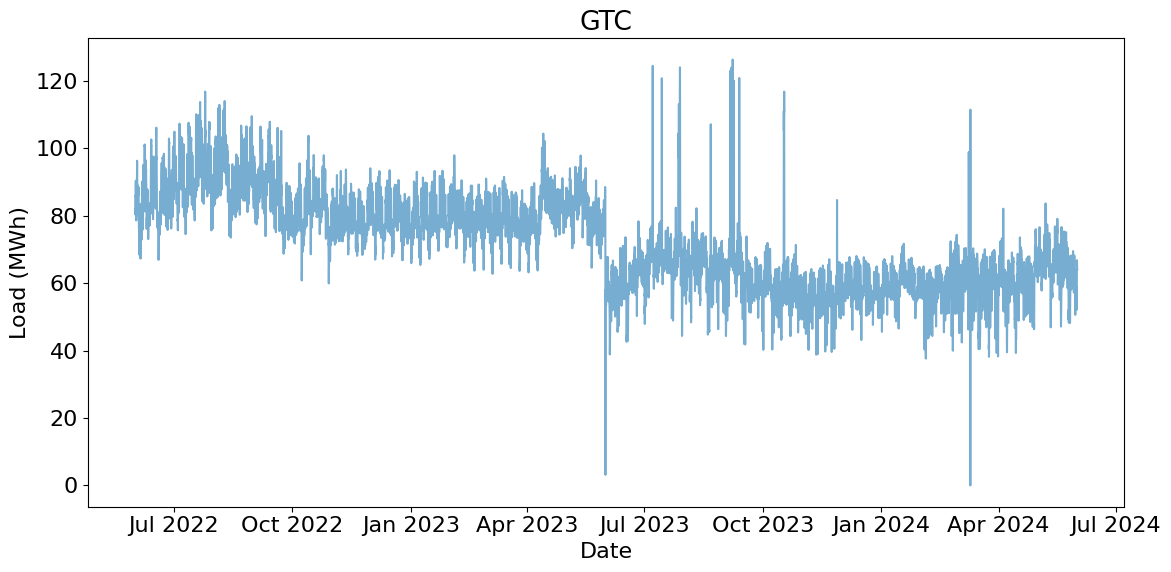

In [7]:
gpi = rateclasses["GTC"]
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(xlabel='Date', ylabel='Load (MWh)')
ax.plot(
        gpi["Date"],
        gpi["Load"],
        alpha=0.6,
    )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_title("GTC")
plt.tight_layout()
plt.show()

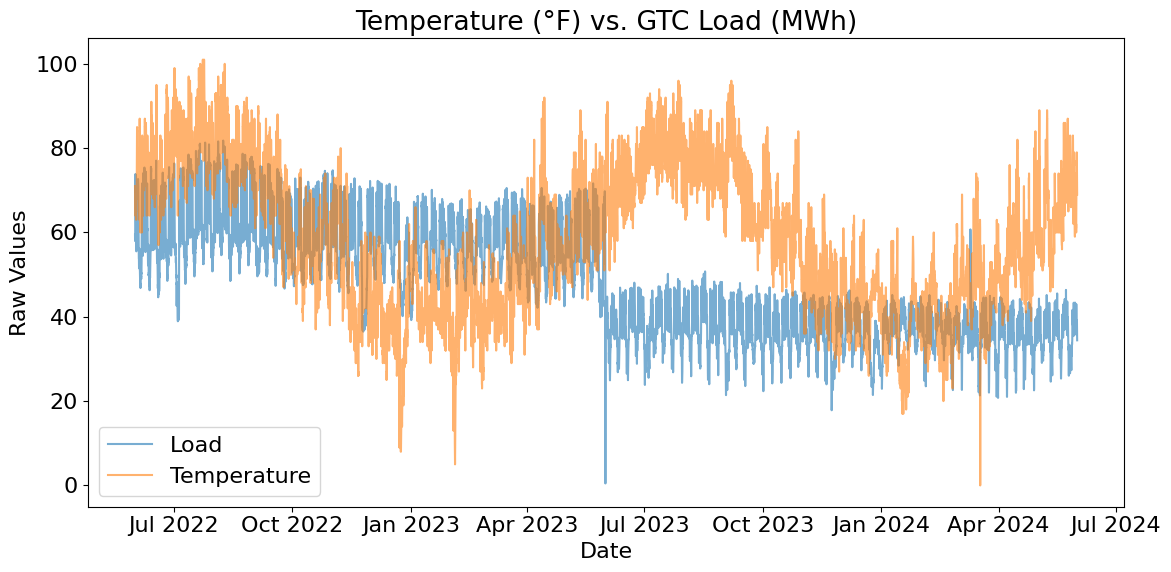

In [8]:
weather = pl.read_csv(PATH_CLEAN / "weather.csv", try_parse_dates=True)

weather_and_gpi = weather.join(rateclasses["GPI"], on="Date")

fig, ax = plt.subplots(figsize=(12, 6))
ax.set(xlabel='Date', ylabel='Raw Values')
ax.plot(
        weather_and_gpi["Date"],
        weather_and_gpi["Load"],
        alpha=0.6,
        label="Load"
    )
ax.plot(
        weather_and_gpi["Date"],
        weather_and_gpi["Temperature"],
        alpha=0.6,
        label="Temperature"
    )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.legend()
ax.set_title("Temperature (°F) vs. GTC Load (MWh)")
plt.tight_layout()
plt.show()

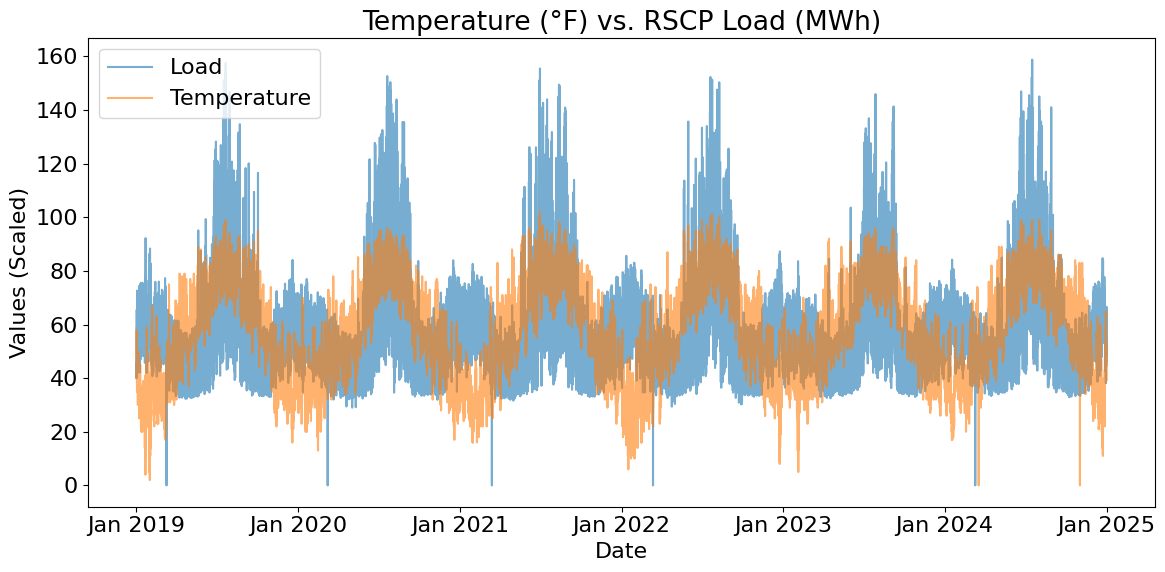

In [9]:
weather_and_rscp = weather.join(rateclasses["RSCP"], on="Date")
weather_and_rscp = weather_and_rscp.with_columns(
    pl.col("Load") * (pl.col("Temperature").mean() / pl.col("Load").mean())
)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set(xlabel='Date', ylabel='Values (Scaled)')
ax.plot(
        weather_and_rscp["Date"],
        weather_and_rscp["Load"],
        alpha=0.6,
        label="Load"
    )
ax.plot(
        weather_and_rscp["Date"],
        weather_and_rscp["Temperature"],
        alpha=0.6,
        label="Temperature"
    )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.legend()
ax.set_title("Temperature (°F) vs. RSCP Load (MWh)")
plt.tight_layout()
plt.show()

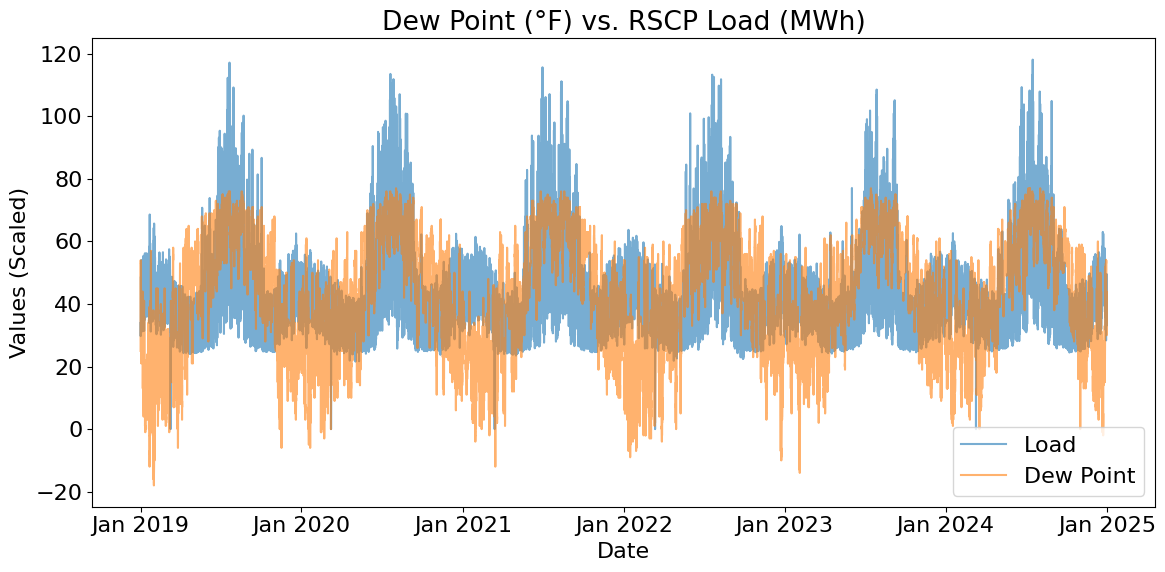

In [10]:
weather_and_rscp = weather.join(rateclasses["RSCP"], on="Date")
weather_and_rscp = weather_and_rscp.with_columns(
    pl.col("Load") * (pl.col("Dew Point").mean() / pl.col("Load").mean())
)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set(xlabel='Date', ylabel='Values (Scaled)')
ax.plot(
        weather_and_rscp["Date"],
        weather_and_rscp["Load"],
        alpha=0.6,
        label="Load"
    )
ax.plot(
        weather_and_rscp["Date"],
        weather_and_rscp["Dew Point"],
        alpha=0.6,
        label="Dew Point"
    )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.legend()
ax.set_title("Dew Point (°F) vs. RSCP Load (MWh)")
plt.tight_layout()
plt.show()

In [12]:
weather

Date,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Difference
datetime[μs],f64,f64,f64,str,f64,f64,f64,f64,str,i64
2019-01-01 01:00:00,40.0,25.0,0.55,"""NNW""",8.0,0.0,30.15,0.0,"""Mostly Cloudy""",0
2019-01-01 02:00:00,46.0,46.0,1.0,"""CALM""",0.0,0.0,29.73,0.1,"""Light Rain""",60
2019-01-01 03:00:00,47.0,46.0,0.97,"""CALM""",0.0,0.0,29.67,0.0,"""Light Rain""",60
2019-01-01 04:00:00,47.0,47.0,1.0,"""WNW""",6.0,0.0,29.63,0.0,"""Fog""",60
2019-01-01 05:00:00,51.0,51.0,1.0,"""WSW""",10.0,0.0,29.6,0.0,"""Light Drizzle""",60
…,…,…,…,…,…,…,…,…,…,…
2024-12-31 20:00:00,50.0,41.0,0.71,"""ENE""",9.0,0.0,29.7,0.0,"""Mostly Cloudy""",60
2024-12-31 21:00:00,50.0,40.0,0.68,"""NE""",10.0,0.0,29.65,0.0,"""Cloudy""",60
2024-12-31 22:00:00,46.0,42.0,0.86,"""NNE""",9.0,0.0,29.58,0.0,"""Light Rain with Thunder""",60


In [13]:
print_entire_df(weather["Condition"].value_counts())

shape: (49, 2)
┌──────────────────────────────┬───────┐
│ Condition                    ┆ count │
│ ---                          ┆ ---   │
│ str                          ┆ u32   │
╞══════════════════════════════╪═══════╡
│ Blowing Snow / Windy         ┆ 1     │
│ N/A                          ┆ 1     │
│ T-Storm                      ┆ 46    │
│ Haze                         ┆ 97    │
│ Light Snow and Sleet         ┆ 3     │
│ Partly Cloudy / Windy        ┆ 426   │
│ Light Snow and Sleet / Windy ┆ 1     │
│ Mostly Cloudy / Windy        ┆ 719   │
│ Snow / Windy / Fog           ┆ 1     │
│ Mist                         ┆ 120   │
│ Light Snow / Windy           ┆ 53    │
│ Haze / Windy                 ┆ 1     │
│ Snow                         ┆ 22    │
│ Cloudy / Windy               ┆ 171   │
│ Light Freezing Rain          ┆ 10    │
│ Snow and Sleet               ┆ 9     │
│ Light Rain                   ┆ 3636  │
│ Light Rain with Thunder      ┆ 118   │
│ Snow and Sleet / Windy       ┆ 6     │
│